## Topic 1: Introduction to Time Series

In [1]:
#import basic libraries needed
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import itertools

# Ignore harmless warnings
import warnings
warnings.filterwarnings("ignore")

### 1.1: Loading Time Series Data

In [2]:
#load the data
df = pd.read_excel("/home/sarah/My Projects/Time series/Daily Sales Mega 21 - 22.xlsx")
df

,Year,Month,Day,Sales
0,2021,1,1,1.851228e+07
1,2021,1,2,2.316229e+07
2,2021,1,3,1.607916e+06
3,2021,1,4,8.756488e+07
4,2021,1,5,5.865805e+07
...,...,...,...,...
650,2022,10,17,3.524410e+07
651,2022,10,18,2.272823e+07
652,2022,10,19,1.976213e+07
653,2022,10,20,1.589571e+07


`printing information about a DataFrame including the index dtype and columns, non-null values and memory usage.`

In [3]:
df.info(verbose= True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    655 non-null    int64  
 1   Month   655 non-null    int64  
 2   Day     655 non-null    int64  
 3   Sales   655 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 20.6 KB


check for any missing values in the dataframe.

## Topic 2: Dealing with Missing Data

It's pretty common for a time series dataset to have missing values as real-world data tends to be messy and imperfect. The simplest way to detect missing values is either plotting the data and identifying disjoint areas of time series, or by using a combination of `.isnull()` and `.sum()` methods:  

In this case, there is no missing data. When data are missing, they can be handled in a multitude of ways: 
* Drop the data elements with missing values (this may result in low accuracy and loss of valuable information)
* Fill in the missing values under a defined criteria 
* Use advanced machine learning methods to predict the missing values 

 In general, the `.fillna()` method can be used along with methods like `.bfill()` of `.ffill()` as an argument/criterion for filling in missing values . `.bfill()` (backward filling) looks for the next valid entry in the time series and fills the gaps with this value. Similarly, `.ffill()` can be used to copy forward the previous valid entry of the time series 


In [4]:
df.isna().sum()

Year     0
Month    0
Day      0
Sales    0
dtype: int64

There are no missing records.

## Topic 3: Pandas To_DateTime

Pandas .to_datetime() is a method that allows you to convert a string into DateTimes.This is Useful when working with Time series Data
[see Documentation](https://dataindependent.com/pandas/pandas-to-datetime-string-to-date-pd-to_datetime/)


`While working with time series data in Python, two things can make your life easier:`

- Dates are in the index of the DataFrame (helps you with plotting)
- The columns are understood by Python as true "date" classes

We need to do two things now: 

1. Make sure that we change the dates in our dataset from "non-null object" to "non-null datetime" (i.e., change the data type of dates). This can be done using the `to_datetime()` function from Pandas. To make sure Python understands the date correctly, a `format` argument can be passed [as specified in the documentation](https://pandas.pydata.org/pandas-docs/stable/timeseries.html#providing-a-format-argument).


### 3.1: combine year, month and day into a single date


In [5]:
#combine year,month and day to a single Date column
df['Date']=pd.to_datetime(df[['Year','Month','Day']])

In [6]:
#display the first 5 records of the dataFrame
df.head()

,Year,Month,Day,Sales,Date
0,2021,1,1,1.851228e+07,2021-01-01
1,2021,1,2,2.316229e+07,2021-01-02
2,2021,1,3,1.607916e+06,2021-01-03
3,2021,1,4,8.756488e+07,2021-01-04
4,2021,1,5,5.865805e+07,2021-01-05


In [7]:
# Convert Date to a datetime column
df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%y')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 655 entries, 0 to 654
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Year    655 non-null    int64         
 1   Month   655 non-null    int64         
 2   Day     655 non-null    int64         
 3   Sales   655 non-null    float64       
 4   Date    655 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 25.7 KB


2. Ensure the date becomes the index. 

In [9]:
# Make Date the index 
df.set_index('Date', inplace=True)

In [10]:
df.head()

,Year,Month,Day,Sales
Date,,,,
2021-01-01,2021,1,1,1.851228e+07
2021-01-02,2021,1,2,2.316229e+07
2021-01-03,2021,1,3,1.607916e+06
2021-01-04,2021,1,4,8.756488e+07
2021-01-05,2021,1,5,5.865805e+07


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 655 entries, 2021-01-01 to 2022-10-21
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    655 non-null    int64  
 1   Month   655 non-null    int64  
 2   Day     655 non-null    int64  
 3   Sales   655 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 25.6 KB


There are only 4 column now and not 5 as before

## Topic 4: Resampling

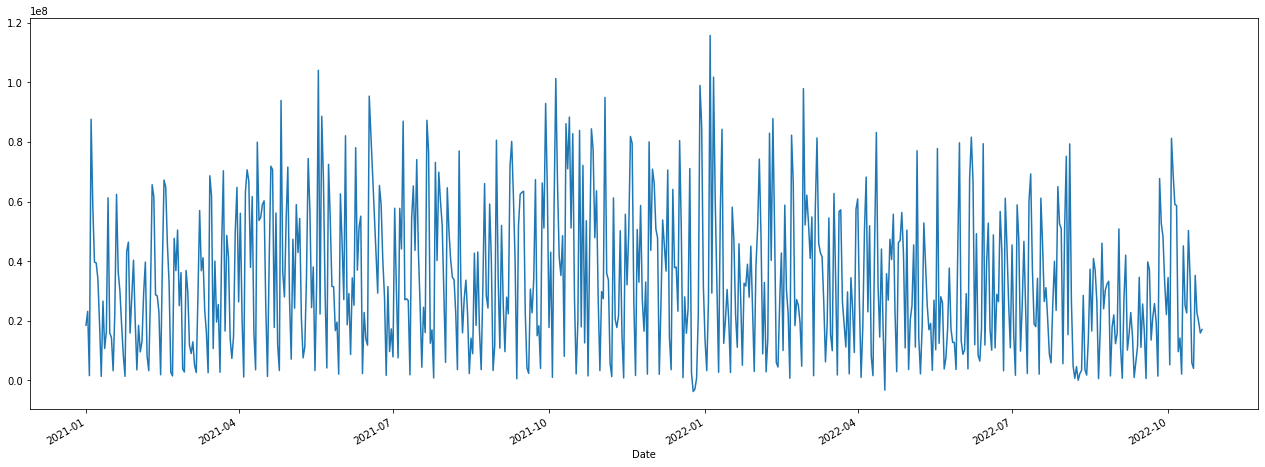

In [12]:
# PLot daily sales
df['Sales'].plot(figsize=(22,8))

- Pandas has a simple, powerful, and efficient functionality for performing resampling operations when converting the frequency conversion (e.g., converting monthly data into yearly data). This is very common in financial applications.

- This daily data is alot in that when being plotted it becomes impossible to read the graph hence the need to downsample the data. `Resampling` helps in changing the `frequency` at which the time series is reported.

- Resampling derives more reliable and consistent data

### 4.1: Downsampling
-Downsampling decreses time frequency e.g

       `seconds to hour`
       `month to quarter or year`

Did you notice that the date is now in the index!? Having the date as the index has several advantages, among others, easy visualization with dates on the x-axis, and the functionality to [resample](https://www.statology.org/python-resample-time-series/) the data. 
 

In the following cell, we are using the `.resample()` method to change the frequency of the time series to monthly (using the string `'MS'`) and then calculating the monthly mean. 

In [13]:
monthly_sales = df.resample('MS')
monthly_mean = monthly_sales.mean()

In [14]:
monthly_mean.head()

,Year,Month,Day,Sales
Date,,,,
2021-01-01,2021.0,1.0,16.0,2.739022e+07
2021-02-01,2021.0,2.0,14.5,2.908218e+07
2021-03-01,2021.0,3.0,16.0,2.954600e+07
2021-04-01,2021.0,4.0,15.5,4.376903e+07
2021-05-01,2021.0,5.0,16.0,3.779107e+07


### 4.2: Upsampling

In some cases, it is useful to create upsampled time series as well, especially if you're trying to merge several time series with different frequencies. You can do this by using the `.resample()` method with an interval that is more frequent than the timestamp from the original time series. 

In the following cell, we change the frequency of the data to 12 hours (using thr string `'12H'`) and then chain the `.asfreq()` method to return the resulting data.

In [15]:
sales_daily = df.resample('12H').asfreq()
sales_daily.head()

,Year,Month,Day,Sales
Date,,,,
2021-01-01 00:00:00,2021.0,1.0,1.0,18512281.92
2021-01-01 12:00:00,NaN,NaN,NaN,NaN
2021-01-02 00:00:00,2021.0,1.0,2.0,23162287.24
2021-01-02 12:00:00,NaN,NaN,NaN,NaN
2021-01-03 00:00:00,2021.0,1.0,3.0,1607915.98


As you can see, these new timestamps all have missing values in the resulting data. One of the common ways around this is to fill the current missing value with a previous valid one. To do this, you can use the `.ffill()` method as shown below: 

In [16]:
sales_daily_fill = sales_daily.ffill()
sales_daily_fill.head()

,Year,Month,Day,Sales
Date,,,,
2021-01-01 00:00:00,2021.0,1.0,1.0,18512281.92
2021-01-01 12:00:00,2021.0,1.0,1.0,18512281.92
2021-01-02 00:00:00,2021.0,1.0,2.0,23162287.24
2021-01-02 12:00:00,2021.0,1.0,2.0,23162287.24
2021-01-03 00:00:00,2021.0,1.0,3.0,1607915.98


We dont need to upsample in our case since we only need monthly sales

## Topic 5: Selecting and slicing time series data

Pandas carries the ability to handle date stamp indices allowing quick and handy way of slicing data. For example, we can slice our dataset to only retrieve data points that come after the year 2022: 

In [17]:
sales_2021 = monthly_mean[:'2021']
sales_2021.head()


,Year,Month,Day,Sales
Date,,,,
2021-01-01,2021.0,1.0,16.0,2.739022e+07
2021-02-01,2021.0,2.0,14.5,2.908218e+07
2021-03-01,2021.0,3.0,16.0,2.954600e+07
2021-04-01,2021.0,4.0,15.5,4.376903e+07
2021-05-01,2021.0,5.0,16.0,3.779107e+07


In [18]:
sales_2022 = monthly_mean['2022':]
sales_2022.head()

,Year,Month,Day,Sales
Date,,,,
2022-01-01,2022.0,1.0,16.0,3.447437e+07
2022-02-01,2022.0,2.0,14.5,3.700581e+07
2022-03-01,2022.0,3.0,16.0,3.516177e+07
2022-04-01,2022.0,4.0,15.5,3.429675e+07
2022-05-01,2022.0,5.0,16.0,2.551167e+07


## Topic 6: Visualizations

In [19]:
result=sales_2021.sort_values('Sales')
result

,Year,Month,Day,Sales
Date,,,,
2021-01-01,2021.0,1.0,16.000000,2.739022e+07
2021-02-01,2021.0,2.0,14.500000,2.908218e+07
2021-03-01,2021.0,3.0,16.000000,2.954600e+07
2021-08-01,2021.0,8.0,16.000000,3.097381e+07
2021-06-01,2021.0,6.0,14.884615,3.541568e+07
2021-11-01,2021.0,11.0,15.500000,3.626044e+07
2021-12-01,2021.0,12.0,16.000000,3.728185e+07
2021-05-01,2021.0,5.0,16.000000,3.779107e+07
2021-09-01,2021.0,9.0,15.500000,3.911647e+07


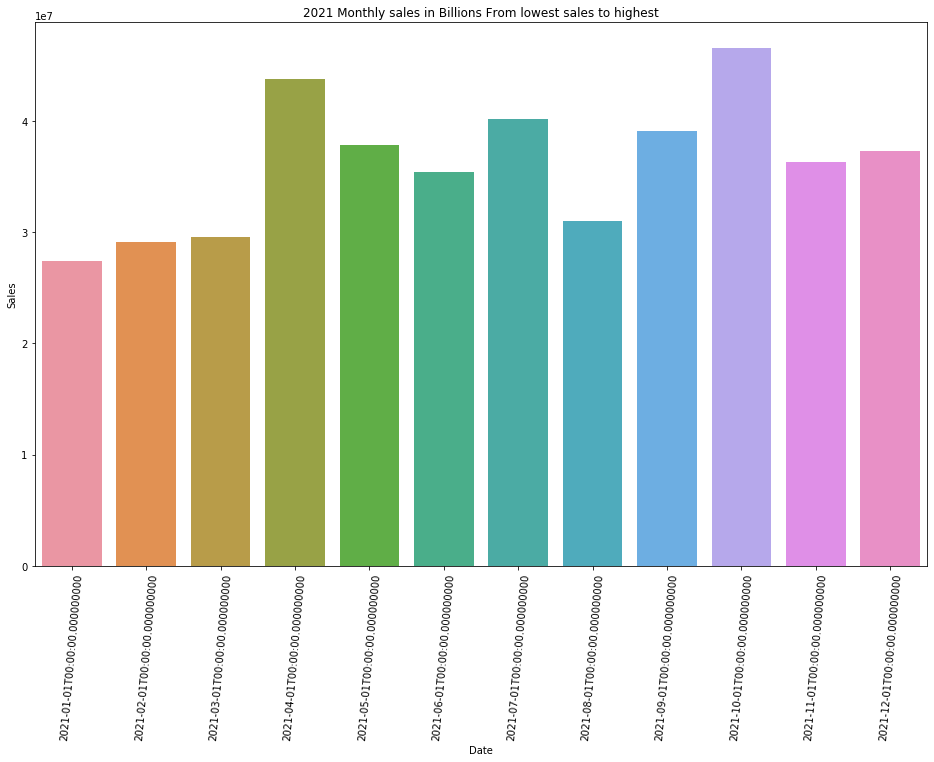

In [20]:
# Plotting sales per month in 2021
plt.figure(figsize=(16,10))
sns.barplot(data=result, x=result.index, y="Sales",)
plt.xticks(rotation=85)
plt.title("2021 Monthly sales in Billions From lowest sales to highest")
plt.show()

From the Analysis above you realize that `January` had the lowest sales in 2021 while `october` had the highest sales.

In [21]:
result_2=sales_2022.sort_values('Sales')
result_2

,Year,Month,Day,Sales
Date,,,,
2022-08-01,2022.0,8.0,16.0,2.279207e+07
2022-09-01,2022.0,9.0,15.5,2.332838e+07
2022-05-01,2022.0,5.0,16.0,2.551167e+07
2022-10-01,2022.0,10.0,11.0,3.005840e+07
2022-06-01,2022.0,6.0,15.5,3.154025e+07
2022-07-01,2022.0,7.0,16.0,3.160384e+07
2022-04-01,2022.0,4.0,15.5,3.429675e+07
2022-01-01,2022.0,1.0,16.0,3.447437e+07
2022-03-01,2022.0,3.0,16.0,3.516177e+07


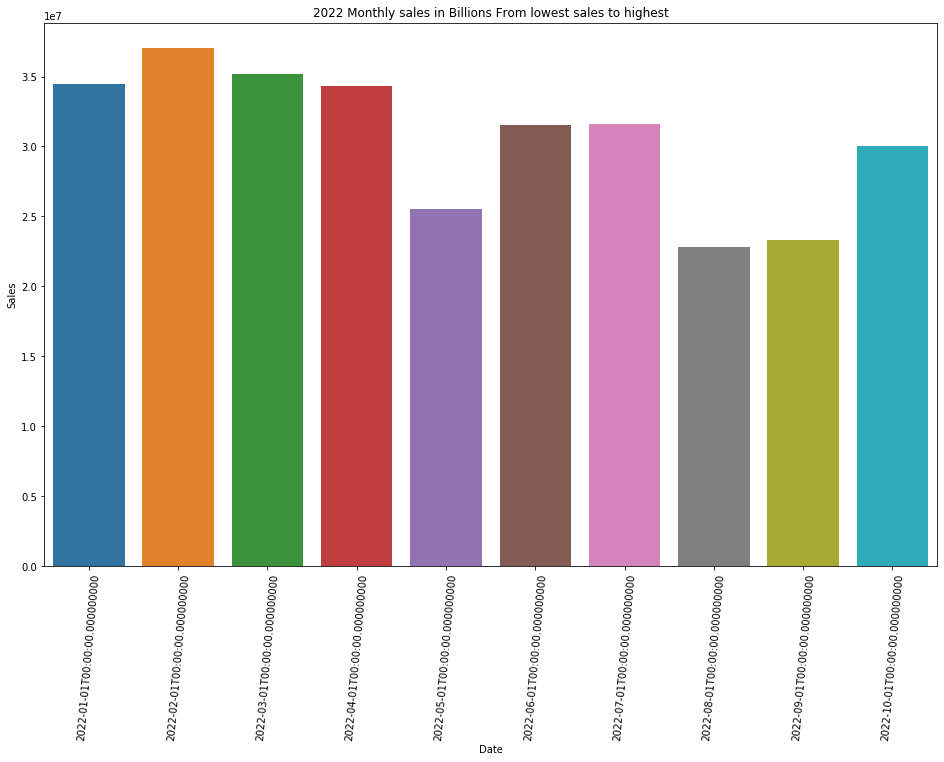

In [22]:
# Plotting sales per month in 2022
plt.figure(figsize=(16,10))
sns.barplot(data=result_2, x=result_2.index, y="Sales",)
plt.xticks(rotation=85)
plt.title("2022 Monthly sales in Billions From lowest sales to highest")
plt.show()

From the Analysis above you realize that `August` had the lowest sales in 2022 while `february and January` had the highest sales.

##### 2022 sales

In [23]:
import matplotlib.dates as mpl_dates
sales_2022.reset_index(inplace=True)
sales_2022['Date']=sales_2022['Date'].apply(mpl_dates.date2num)
sales_2022 = sales_2022.astype(float)

In [24]:
x = sales_2022.Date
y = sales_2022.Sales

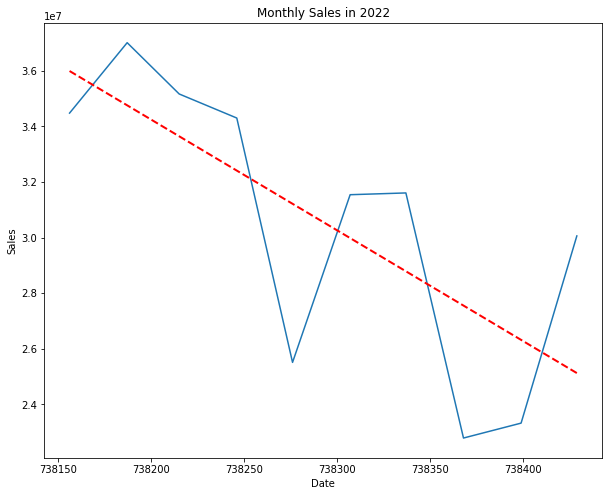

In [25]:
# display monthly sales for 2022
plt.figure(figsize=(10,8))
sns.lineplot(data=sales_2022, x="Date", y="Sales")
plt.title('Monthly Sales in 2022')
plt.ylabel("Sales")

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color="red", linewidth=2, linestyle="--")

2022 sales had a downward Trend

##### 2021 sales

In [26]:
import matplotlib.dates as mpl_dates
sales_2021.reset_index(inplace=True)
sales_2021['Date']=sales_2021['Date'].apply(mpl_dates.date2num)
sales_2021 = sales_2021.astype(float)

In [27]:
x = sales_2021.Date
y = sales_2021.Sales

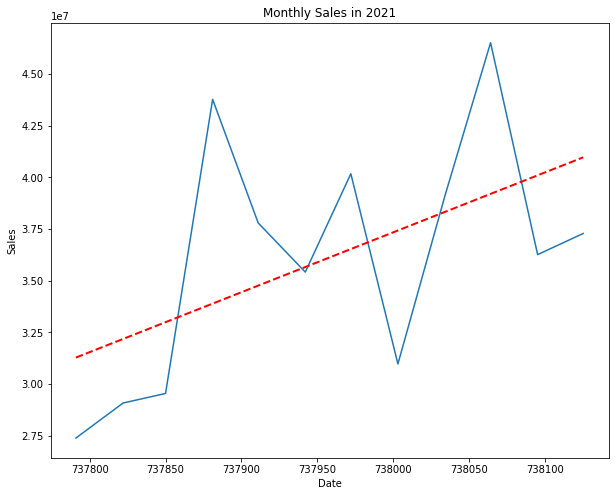

In [28]:
# display monthly sales for 2021
plt.figure(figsize=(10,8))
sns.lineplot(data=sales_2021, x="Date", y="Sales")
plt.title('Monthly Sales in 2021')
plt.ylabel("Sales")

#calculate equation for trendline
z = np.polyfit(x, y, 1)
p = np.poly1d(z)

#add trendline to plot
plt.plot(x, p(x),color="red", linewidth=2, linestyle="--")

2021 sales had an upward trend

`To compare the 2021 and 2022 monthly sales using a single plot`
[See Documentation](https://dev.to/kedarghule/how-to-combine-two-line-charts-in-seaborn-and-python-57ll)

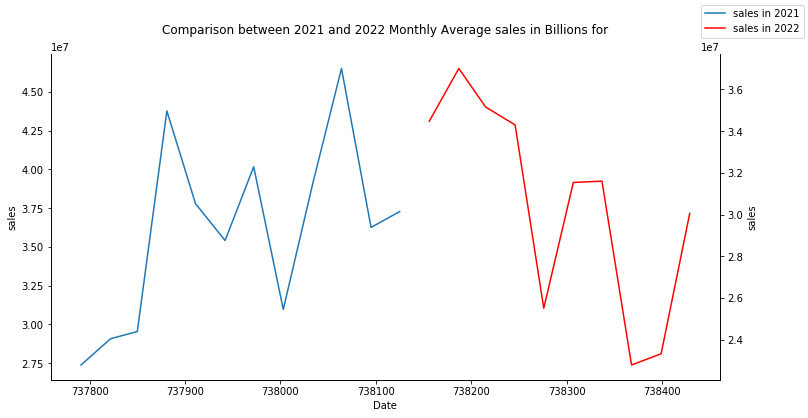

In [29]:
# Line Chart For Agricultural Land Cover
fig, ax = plt.subplots(figsize=(12,6))
lineplot = sns.lineplot(data=sales_2021, x="Date", y="Sales", 
                        label = 'sales in 2021', legend=False)
sns.despine()
plt.ylabel('sales')
plt.title('Comparison between 2021 and 2022 Monthly Average sales in Billions for', pad=20);

# Line Chart For Forest Cover
ax2 = ax.twinx()
lineplot2 = sns.lineplot(data=sales_2022, x="Date", y="Sales", ax=ax2, color="r", 
                         label ='sales in 2022', legend=False) 
sns.despine(right=False)
plt.ylabel('sales')
ax.figure.legend();

The plot above has two scales for sales since there are two graphs.
From the plot you realize that 2021 had an upward trend for the sales.
* The Highest sales were in October(10 month) at  `4.6 billions`
* The lowest sales were in February at  `2.7 billions`

As shown, the sales have an Downward in the year 2022. 
* The Highest sales were in March at  `3.7 billions`
* The lowest sales were in October at  `2.2 billions`

Text(0.5, 0, 'Date')

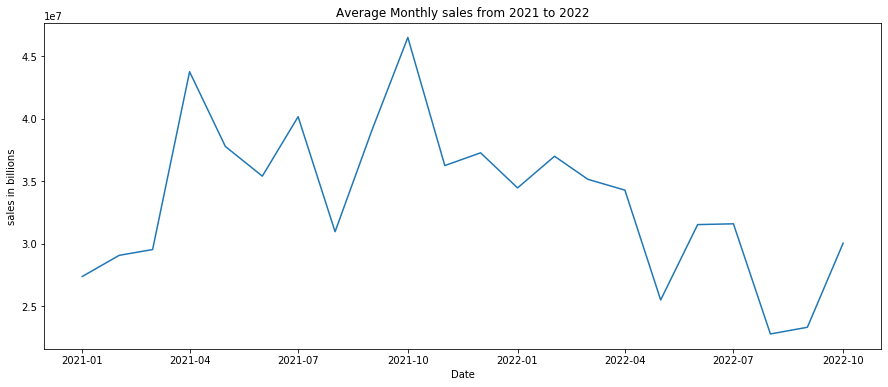

In [30]:
# Plotting sales per month in 2021 and 2022
fig, ax = plt.subplots(figsize=(15, 6))
ax.plot(monthly_mean.index, monthly_mean.Sales)
ax.set_title("Average Monthly sales from 2021 to 2022")
ax.set_ylabel("sales in billions")
ax.set_xlabel("Date")


##### `YEARLY SALES`

In [31]:
yealy_sales= df.resample('A').mean()
yealy_sales

,Year,Month,Day,Sales
Date,,,,
2021-12-31,2021.0,6.531856,15.678670,3.614679e+07
2022-12-31,2022.0,5.374150,15.346939,3.053812e+07


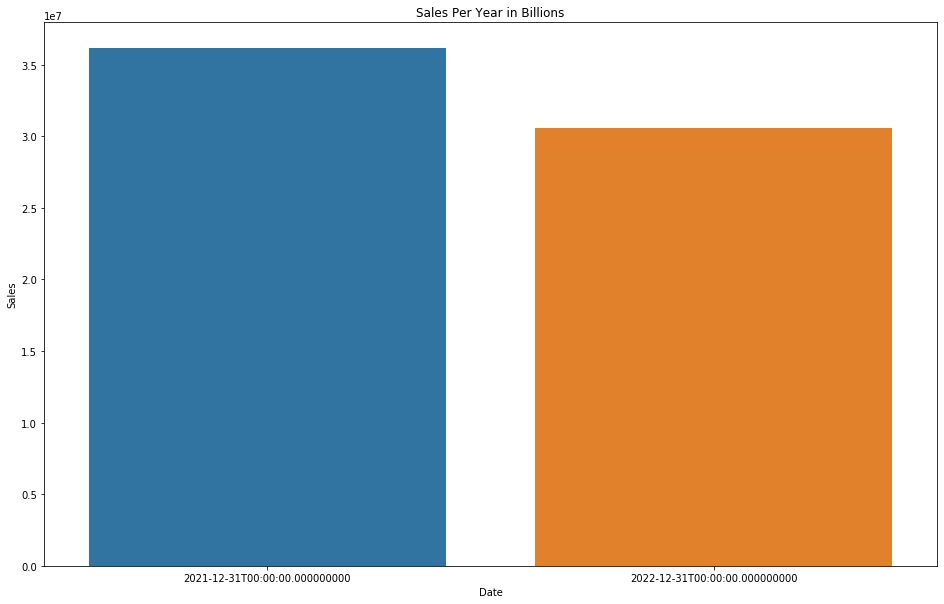

In [32]:
# Plotting sales per year
plt.figure(figsize=(16,10))
sns.barplot(x=yealy_sales.index, y=yealy_sales['Sales'])
plt.xticks(rotation=0)
plt.title("Sales Per Year in Billions")
plt.show()

In [33]:
monthly_mean.head()

,Year,Month,Day,Sales
Date,,,,
2021-01-01,2021.0,1.0,16.0,2.739022e+07
2021-02-01,2021.0,2.0,14.5,2.908218e+07
2021-03-01,2021.0,3.0,16.0,2.954600e+07
2021-04-01,2021.0,4.0,15.5,4.376903e+07
2021-05-01,2021.0,5.0,16.0,3.779107e+07


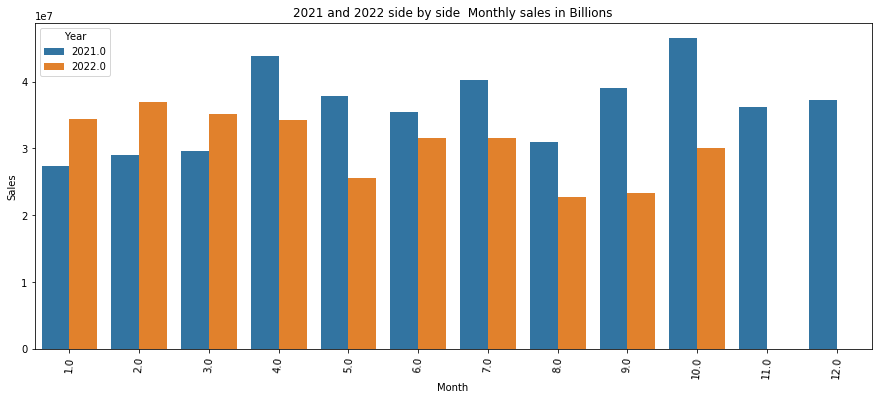

In [34]:
# Plotting sales per month in 2021 and 2022
fig, ax = plt.subplots(figsize=(15, 6))

ax=sns.barplot(data=monthly_mean, x='Month', y="Sales",hue = 'Year')
plt.xticks(rotation=85)
plt.title("2021 and 2022 side by side  Monthly sales in Billions")
plt.show()

## Topic 7: Trend Analysis

### 7.1:Stationarity in data
- A time series is said to be stationary if its statistical properties such as mean, variance, etc. remain constant over time.
- Why is it important? Because most time series models work on the assumption that `the time series are stationary`. For general time series datasets, if it shows a particular behavior over time, there is a very high probability that it will follow a similar behavior in the future. Also, the theories related to stationary series are more mature and easier to implement as compared to non-stationary series.


### 7.2: Testing for trends

There are two formal ways to assess trends;
- Rolling statistics
- The Dickey-Fuller Test



#### 7.2.1: Rolling statistics

We can plot the moving average or moving variance and see if it varies with time. By moving average/variance we mean **at any point in time $t$, we can take the average/variance of the $m$ last time periods. $m$ is then known as the window size**. 

Pandas has a built-in method called [rolling()](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.rolling.html), which can be called along with `.mean()` and `.std()` to calculate these rolling statistics. I will take a window size of 5.

In [35]:
monthly_mean.head()

,Year,Month,Day,Sales
Date,,,,
2021-01-01,2021.0,1.0,16.0,2.739022e+07
2021-02-01,2021.0,2.0,14.5,2.908218e+07
2021-03-01,2021.0,3.0,16.0,2.954600e+07
2021-04-01,2021.0,4.0,15.5,4.376903e+07
2021-05-01,2021.0,5.0,16.0,3.779107e+07


In [36]:
#Drop unnecessary Columns
monthly_mean.drop(columns=['Year', 'Month','Day'], inplace=True)

In [37]:
roll_mean = monthly_mean.rolling(window=8, center=False).mean()
roll_std = monthly_mean.rolling(window=8, center=False).std()

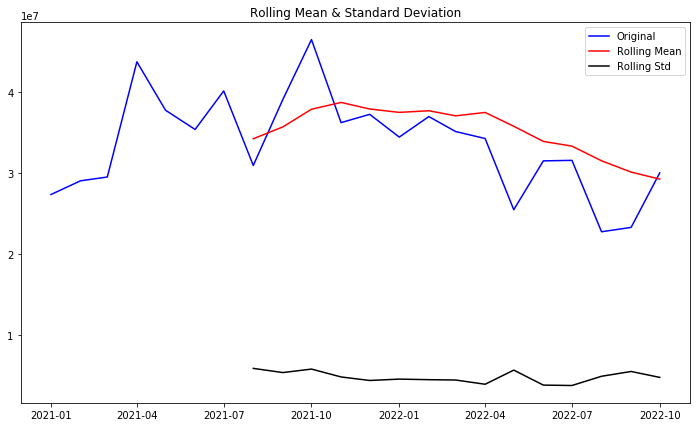

In [38]:
fig = plt.figure(figsize=(12,7))
plt.plot(monthly_mean, color='blue', label='Original')
plt.plot(roll_mean, color='red', label='Rolling Mean')
plt.plot(roll_std, color='black', label = 'Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

`The red and black lines represent the rolling mean and rolling standard deviations. You can see that the mean is not constant over time, so we can reconfirm our conclusion that the time series is not stationary based on rolling mean and rolling standard error.`

#### 7.2.2: The Dickey-Fuller Test

The `Dickey-Fuller test` is a statistical test for testing stationarity. The `null-hypothesis for the test is that the time series is not stationary.` So if the test statistic is less than the `critical(P) value`, we reject the null hypothesis and say that the series is stationary. The Dickey-Fuller test is available in `tsa.stattools` sub-module of the `statsmodels` library. More details on this can be viewed [here](http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.adfuller.html).

In [39]:
from statsmodels.tsa.stattools import adfuller
#Ho: time series is not stationary
#H1: time series is stationary

# a function to display the dickey-fuller test results
def adfuller_test(sales_df):
    result=adfuller(sales_df)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations Used']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )
    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis, indicating it is non-stationary ")
    

In [40]:
adfuller_test(monthly_mean['Sales'])

ADF Test Statistic : -2.7607934781601706
p-value : 0.06409604971703035
#Lags Used : 0
Number of Observations Used : 21
weak evidence against null hypothesis, indicating it is non-stationary 


To interpret the test results, you only need to look at the `p value.` And you use the following simple method:

`If p< 0.05 ; Data is stationary`

`If p>0.05; Data is not stationary`

It’s not a hard and fast rule, but a stationary data should have a `small p value.` `Larger p value` could indicate presence of certain trends(varying mean) or seasonality as well.

## Topic 8:Removing Trends

Although the stationarity assumption is required in several time series modeling techniques, few practical time series are stationary.Thus the need to make a time series stationary.It is almost impossible to make a series perfectly stationary.

### 8.1: Differencing

One of the most common methods of dealing with both trend and seasonality is differencing. In this technique, we take the difference of an observation at a particular time instant with that at the previous instant (i.e. a so-called 1-period "lag").

This mostly works pretty well in improving stationarity. First-order differencing can be done in Pandas using the .diff() method with periods=1 (denoting a 1-period lag). Documentation on `.diff()` can be found [here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.diff.html).

In [41]:
#Performing differencing
month_mean_diff = monthly_mean.diff(periods=1)
month_mean_diff.head()

,Sales
Date,
2021-01-01,NaN
2021-02-01,1.691956e+06
2021-03-01,4.638245e+05
2021-04-01,1.422302e+07
2021-05-01,-5.977952e+06


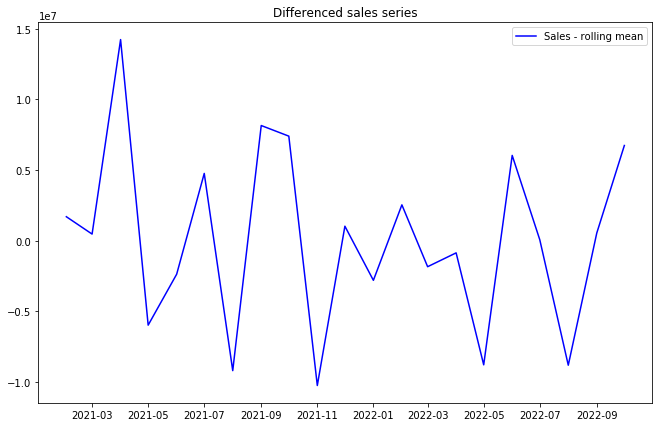

In [42]:
#plot the monthly sales after trend removal
fig = plt.figure(figsize=(11,7))
plt.plot(month_mean_diff, color='blue',label='Sales - rolling mean')
plt.legend(loc='best')
plt.title('Differenced sales series')
plt.show(block=False)

In [43]:
adfuller_test(month_mean_diff['Sales'].dropna())

ADF Test Statistic : -3.789882882218755
p-value : 0.0030125391432932035
#Lags Used : 2
Number of Observations Used : 18
strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary


This seems to work pretty well if you want to make the series stationary!

## Topic 9: Predictive Modeling Time Series Data

 


### 9.1:Model : Seasonal Autoregressive Integrated Moving Average (SARIMA)
ARIMA MODEL is composed of 3 terms(`Auto-Regression` + `Integrated`+ `Moving-Average`)

`ARIMA` models are denoted by `ARIMA(p, d, q).`

1. `Auto-Regression:`

This basically means that you are using the `previous values` of the time series in order to `predict the future.` How many past values you use, determine the order of the AR model. 

AR will regress to itself With a time lag.Here’s how an AR(1) model `i.e we are taking p=1 (taking the previous month to calculate the current month of the sales)`looks like:

`Yt = Bo + B1(Yt-1) +B2(Yt-2) +B3(Yt-3)`


2. `Integrated:`

If you are data set is not `stationary`, you most often need to perform some sort of `difference` operation to make it stationary. If you are differencing with previous value, its `order 1` and so on.Depending on your data, you might have to repeat the differencing to get a second order differencing , third order and so on.

3.  Moving Average:

This basically means that you are using previous `errors` to make the future prediction.  By seeing how wrong you were in your prediction, you take that into account to make a better prediction. And just like in an AR model, the number of previous errors(also called `number of lags`) you use, determines the order of the model.

Here’s how MA(1) order equation looks like:
 
`Y(t)= Mean + Some_Constant*Error(t-1) +Error(t)`

So our main job is to decide the order of the `AR, I, MA` parts which are donated by`(p,d,q)` respectively.
 

#### 9.1.1: Split the Dataset into training and testing data.

Before training the model, I will split the data set into two sections i.e `training data` and `testing data`. This is done because the model has to be `trained` first on the `training data` and the testing data is hidden from the model. Once model is ready, we ask it to make predictions on the `test data` and see how well it performs.

In [44]:
data_diff = month_mean_diff['Sales'].dropna()

In [45]:
#split the data into training and testing data
y_train = monthly_mean[:len(monthly_mean) - 6] # taking first 16 months sales as training data
y_test = monthly_mean[len(monthly_mean) - 6:]  # taking last 6 months sales as testing data

print(y_train.shape,y_test.shape)

(16, 1) (6, 1)


I am reserving the last 6 months of the data as the testing data for our model.

#### 9.1.2 ACF and PACF

In [46]:
# Plot the ACF
from statsmodels.graphics.tsaplots import plot_acf
from tensorflow.python import train
fig, ax = plt.subplots(figsize=(8,3))
plot_acf(y_train,ax=ax, lags=8);

ModuleNotFoundError: No module named 'tensorflow'

In [ ]:
# Plot the PACF
from statsmodels.graphics.tsaplots import plot_pacf
fig, ax = plt.subplots(figsize=(8,3))
plot_pacf(y_train['Sales'], ax = ax, lags=7);

### 9.2:Fitting the SARIMAX Model 

In [ ]:
# creating the SARIMAX model
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y_train['Sales'],order=(1, 1, 2),seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()

#### 9.2.1 Hyperparameter Tuning
##### Determing p,d,q combinations with AIC scores.

In [ ]:
# parameters for sarima
p = range(0,2)
d = range(0,2)
q = range(0,2)

pdq = list(itertools.product(p,d,q))

seasonal_pdq = [(x[0], x[1], x[2], 12) for x in pdq] # ALl combinations

In [ ]:
# Determing p,d,q combinations with AIC scores.
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            results = mod.fit()

        except:
            continue
print('ARIMA{}x{}12 - AIC:{}'.format(param, param_seasonal, results.aic))

In [ ]:
#fitting the model with the combinations from tuning 
from statsmodels.tsa.statespace.sarimax import SARIMAX
model = SARIMAX(y_train['Sales'],order=(1, 1, 4),seasonal_order=(1,1,1,12))
results = model.fit()
results.summary()

#### 9.2.1 predicting Sales of past dates just to see how the model predicts

In [ ]:
#predict the test data to compare with the real test data later
start =len(y_train)
end = len(y_train) + len(y_test)-1

predictions = results.predict(start=pd.to_datetime('2021-01-01'),end=end, dynamic= False, typ='levels').rename(' Predictions')

In [ ]:
#plot predictions and test data to compare
title = "ACTUAL SALES VS PREDICTED SALES"
ylabel = "Sales"
xlabel = "Date"

ax = monthly_mean.plot(legend=True,label = 'Actual',figsize=(18,6),title=title)
predictions.plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel =ylabel)

#### 9.2.2 Calculating Model accuracy.
- Evaluation Metrics

There are two popular metrics used in measuring the performance of regression (continuous variable) models i.e `MAE & RMSE`.

`Mean Absolute Error (MAE):` It is the average of the absolute difference between the predicted values and observed values.

`Root Mean Square Error (RMSE):` It is the square root of the average of squared differences between the predicted values and observed values.

`MAE` is easier to understand and interpret but `RMSE` works well in situations where large errors are undesirable. This is because the errors are squared before they are averaged, thus penalizing large errors. In our case, `RMSE` suits well because we want to predict the sales with minimum error (i.e penalize high errors) so that inventory can be managed properly.

The `lower` the `RMSE`, the better a given model is able to “fit” a dataset. However, the range of the dataset you’re working with is important in determining whether or not a given RMSE value is “low” or not.

In [ ]:
#import necessary libraries
from sklearn.metrics import mean_squared_error
from math import sqrt
RMSE = sqrt(mean_squared_error(monthly_mean, predictions)) 
RMSE

##### Normalizing the RMSE Value
One way to gain a better understanding of whether a certain `RMSE` value is `“good”` is to `normalize` it using the following formula:

`Normalized RMSE = RMSE / (max value – min value)`

This produces a value between `0 and 1,` where values closer to `0 `represent better fitting models.[documentation](https://www.statology.org/what-is-a-good-rmse/)

In [ ]:
# sorting the monthly sales in ascending order
sorted_monthly_sales=monthly_mean.sort_values(by='Sales')
sorted_monthly_sales.head()

In [ ]:
# find the maximum sale and the minimum sale
min_value=sorted_monthly_sales['Sales'].iloc[0]
max_value=sorted_monthly_sales['Sales'].iloc[-1]

In [ ]:
# Applying the normalization formulae
Normalized_RMSE = (RMSE) / (max_value-min_value)
Normalized_RMSE 

The model accuracy is better

#### 9.2.3 Making future predictions

In [ ]:
# creating a new dataframe with future dates
from pandas.tseries.offsets import DateOffset
future_dates=[monthly_mean.index[-1]+ DateOffset(months=x)for x in range(0,24)]

In [ ]:
# adding column names from the original dataframe
future_datest_df=pd.DataFrame(index=future_dates[1:],columns=monthly_mean.columns)

In [ ]:
#view the first 5 rows of the new data frame
future_datest_df.head()

In [ ]:
# merge the future dates dataframe with the original dataframe
future_df=pd.concat([monthly_mean,future_datest_df])

In [ ]:
# predict the sales untill 2023-07-01
future_df['predictions']  = results.predict(start=pd.to_datetime('2021-01-01'),end=pd.to_datetime('2023-07-01'), dynamic= False, typ='levels').rename(' Predictions')

In [ ]:
#plot predictions and actual sales data to see the future prediction
title = "ACTUAL SALES VS PREDICTED SALES"
ylabel = "Sales"
xlabel = "Date"

ax = monthly_mean.plot(legend=True,label = 'Actual',figsize=(18,6),title=title)
future_df['predictions'].plot(legend=True)
ax.autoscale(axis='x',tight=True)
ax.set(xlabel=xlabel, ylabel =ylabel)

In [ ]:
# view the first 30rows of the dataframe
future_df